In [13]:
import numpy as np
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

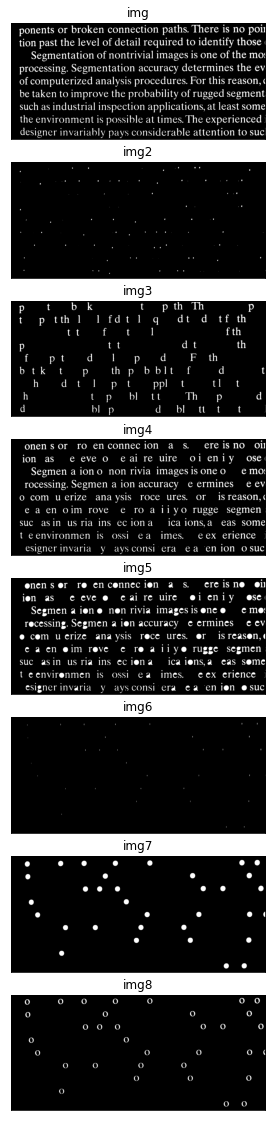

In [14]:
def imreconstruct(img,marker):
    mask = img
    se = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    recon1 = marker
    recon1_old = np.zeros(recon1.shape,np.int8)
    while np.sum(np.sum(recon1 - recon1_old)) != 0:
        recon1_old = recon1
        recon1 = cv.dilate(recon1,se)
        recon1 = recon1 & mask
    return recon1

# import picture
img = cv.imread('text_frombook.png',0)

# ตัดตัวยาว
se = cv.getStructuringElement(cv.MORPH_CROSS,(1,51))
img2 = cv.erode(img,se)
img3 = imreconstruct(img,img2)
img4 = cv.subtract(img, img3)
kernel = np.ones((5,5),np.uint8)


# fill hole
im_floodfill = img4.copy()
h, w = img4.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv.bitwise_not(im_floodfill)
img5 = img4 | im_floodfill_inv

# ตัดตัวที่บางกว่าตัวโอ
se = cv.getStructuringElement(cv.MORPH_CROSS,(39,30))
img6 = cv.erode(img5,se)
img7 = imreconstruct(img5,img6)
img8 = imreconstruct(img,img7)

plt.figure(figsize=([20,20]))
plt.subplot(811),plt.imshow(img,cmap = 'gray')
plt.title('img'),plt.xticks([]),plt.yticks([])
plt.subplot(812),plt.imshow(img2,cmap = 'gray')
plt.title('img2'),plt.xticks([]),plt.yticks([])
plt.subplot(813),plt.imshow(img3,cmap = 'gray')
plt.title('img3'),plt.xticks([]),plt.yticks([])
plt.subplot(814),plt.imshow(img4,cmap = 'gray')
plt.title('img4'),plt.xticks([]),plt.yticks([])
plt.subplot(815),plt.imshow(img5,cmap = 'gray')
plt.title('img5'),plt.xticks([]),plt.yticks([])
plt.subplot(816),plt.imshow(img6,cmap = 'gray')
plt.title('img6'),plt.xticks([]),plt.yticks([])
plt.subplot(817),plt.imshow(img7,cmap = 'gray')
plt.title('img7'),plt.xticks([]),plt.yticks([])
plt.subplot(818),plt.imshow(img8,cmap = 'gray')
plt.title('img8'),plt.xticks([]),plt.yticks([])
# plt.subplot(514),plt.imshow(img9,cmap = 'gray')
# plt.title('img9'),plt.xticks([]),plt.yticks([])
# plt.subplot(515),plt.imshow(img5,cmap = 'gray')
# plt.title('img5'),plt.xticks([]),plt.yticks([])
plt.show()





(Text(0.5, 1.0, 'Foreground'), ([], []), ([], []))

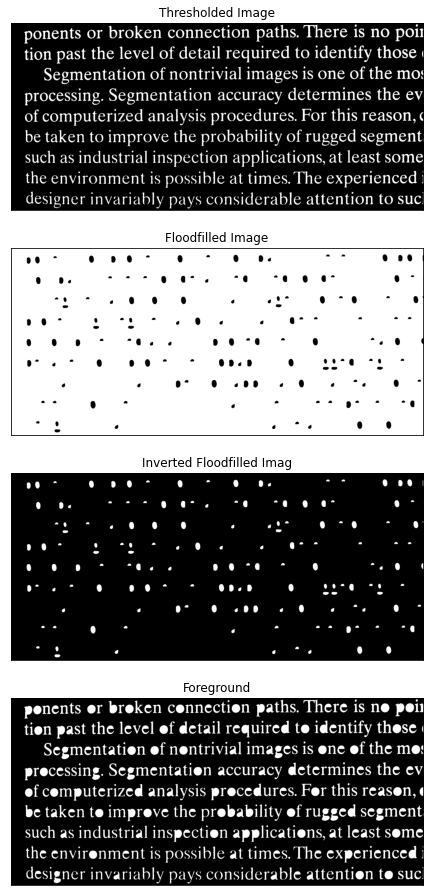

In [15]:
import cv2;
import numpy as np;
import matplotlib.pylab as plt
# Read image
im_th = cv2.imread('text_frombook.png',0)
 


 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

 
# Display images.
plt.figure(figsize=([20,20]))
plt.subplot(511),plt.imshow(im_th,cmap = 'gray')
plt.title('Thresholded Image'),plt.xticks([]),plt.yticks([])
plt.subplot(512),plt.imshow(im_floodfill,cmap = 'gray')
plt.title('Floodfilled Image'),plt.xticks([]),plt.yticks([])
plt.subplot(513),plt.imshow(im_floodfill_inv,cmap = 'gray')
plt.title('Inverted Floodfilled Imag'),plt.xticks([]),plt.yticks([])
plt.subplot(514),plt.imshow(im_out,cmap = 'gray')
plt.title('Foreground'),plt.xticks([]),plt.yticks([])
